In [1]:
from Image import *

In [6]:
train_file_name='/home/ravi/Downloads/train_catvnoncat.h5'
test_file_name='/home/ravi/Downloads/test_catvnoncat.h5'
train_x_orig, train_y, test_x_orig, test_y, classes = load_data(train_file_name,test_file_name)

y = 0. It's a non-cat picture.


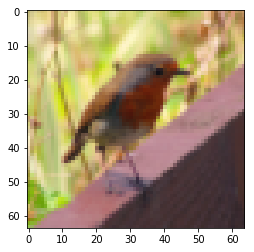

In [7]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [8]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]


In [12]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [26]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=200, print_cost=False, initialization=None,graph=None,lambd=None):

    np.random.seed(1)
    costs = []                     
    
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
        
    else:
        parameters=initialize_parameters_deep(layers_dims)
    
    
    for i in range(0, num_iterations):


        AL, caches =L_model_forward(X, parameters)
        
        # Compute cost.
     
        cost = compute_cost_with_regularization(AL,Y,parameters,lambd)
    
        # Backward propagation.
        
        _,cache=forward_propagation(X, parameters)
        grads =backward_propagation_with_regularization(X, Y, cache, lambd)
         

        # Update parameters.
       
        parameters = update_parameters(parameters, grads, learning_rate)
   
                
        # Print the cost every 1 training example
        if print_cost and i % 1 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 1 == 0:
            costs.append(cost)
        
    if graph==True:
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per iteration)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    
    return parameters, cost

In [20]:
layers_dims=[12288,7,5,1]

In [23]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

x=get_truncated_normal(mean=0, sd=1, low=-4, upp=0)
a=x.rvs(40)


In [24]:
l=0
for i in a:
    l+=1
    parameters,cost=L_layer_model(train_x, train_y, layers_dims=layers_dims,num_iterations=100,print_cost=False,initialization='he',graph=False, lambd=10**i)
    _, test_score=predict(test_x, test_y, parameters)
    _,train_score=predict(train_x, train_y,parameters)
    if train_score- test_score < 0.05:
        final_params=parameters
        print(cost)
        
    print('for {} lambd iteration {} the difference is {}'.format(i,l,train_score-test_score))
    print('==='*20)

Accuracy: 0.76
Accuracy: 0.8229665071770333
for -1.1859652686347784 lambd iteration 1 the difference is 0.06296650717703334
Accuracy: 0.66
Accuracy: 0.7799043062200957
for -1.230058508187391 lambd iteration 2 the difference is 0.11990430622009562
Accuracy: 0.48000000000000004
Accuracy: 0.7464114832535884
for -0.5676533203743401 lambd iteration 3 the difference is 0.2664114832535884
Accuracy: 0.76
Accuracy: 0.8229665071770333
for -1.1813500862761002 lambd iteration 4 the difference is 0.06296650717703334
Accuracy: 0.74
Accuracy: 0.8468899521531099
for -1.13183945147897 lambd iteration 5 the difference is 0.10688995215310992
Accuracy: 0.3400000000000001
Accuracy: 0.6794258373205742
for -0.4476528544417883 lambd iteration 6 the difference is 0.3394258373205741
Accuracy: 0.36000000000000004
Accuracy: 0.6746411483253588
for -1.0437066920616402 lambd iteration 7 the difference is 0.3146411483253588
Accuracy: 0.4
Accuracy: 0.7129186602870813
for -0.5228779111312777 lambd iteration 8 the diffe

Cost after iteration 0: 0.675511
Cost after iteration 1: 0.668077
Cost after iteration 2: 0.660985
Cost after iteration 3: 0.654332
Cost after iteration 4: 0.647420
Cost after iteration 5: 0.640928
Cost after iteration 6: 0.636151
Cost after iteration 7: 0.631460
Cost after iteration 8: 0.626294
Cost after iteration 9: 0.636858
Cost after iteration 10: 0.643295
Cost after iteration 11: 0.625969
Cost after iteration 12: 0.617838
Cost after iteration 13: 0.608202
Cost after iteration 14: 0.599625
Cost after iteration 15: 0.599535
Cost after iteration 16: 0.633754
Cost after iteration 17: 0.643514
Cost after iteration 18: 0.611833
Cost after iteration 19: 0.600672
Cost after iteration 20: 0.593278
Cost after iteration 21: 0.586919
Cost after iteration 22: 0.577342
Cost after iteration 23: 0.572992
Cost after iteration 24: 0.591817
Cost after iteration 25: 0.712541
Cost after iteration 26: 0.645522
Cost after iteration 27: 0.600625
Cost after iteration 28: 0.590866
Cost after iteration 29:

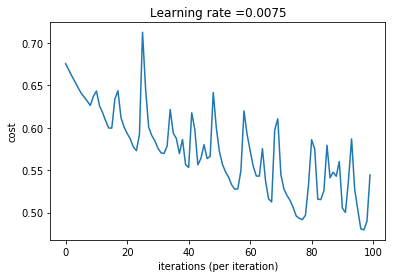

In [32]:
l=10**-1.5388261980599642
parameters,cost=L_layer_model(train_x, train_y, layers_dims=layers_dims,num_iterations=100,print_cost=True,initialization='he',graph=True, lambd=l)

In [33]:
train_pred=predict(train_x, train_y, parameters)

Accuracy: 0.8038277511961721


In [34]:
test_pred=predict(test_x, test_y, parameters)

Accuracy: 0.76
